In [17]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns

In [3]:
df=pd.read_csv("Zomato data .csv")

In [4]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [5]:
df.head(5)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [6]:
df.shape

(148, 7)

In [7]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

In [8]:
resto_count=df['listed_in(type)'].value_counts()

In [9]:
resto_count

listed_in(type)
Dining    110
Cafes      23
other       8
Buffet      7
Name: count, dtype: int64

1. What type of restaurant do the majority of customers order from?

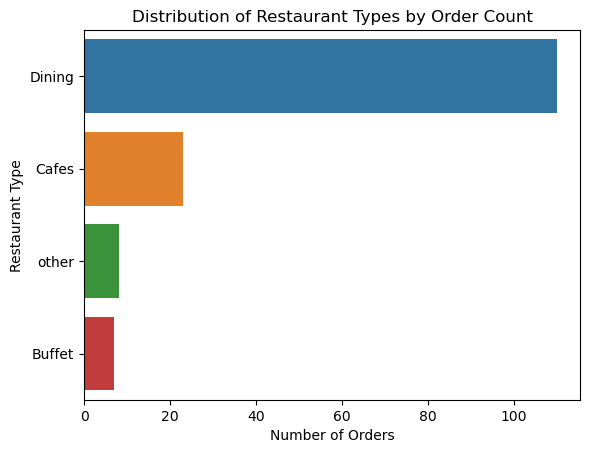

In [12]:
sns.barplot(x=resto_count.values, y=resto_count.index)
plt.title('Distribution of Restaurant Types by Order Count')
plt.xlabel('Number of Orders')
plt.ylabel('Restaurant Type')
plt.show()

In [13]:
votes = df.groupby('listed_in(type)')['votes'].sum().sort_values(ascending=False)

In [14]:
votes

listed_in(type)
Dining    20363
other      9367
Cafes      6434
Buffet     3028
Name: votes, dtype: int64

2. How many votes has each type of restaurant received from customers?

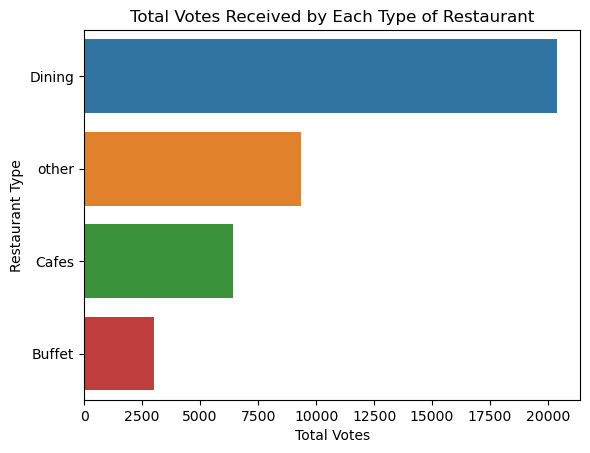

In [16]:
sns.barplot(x=votes.values, y=votes.index)
plt.title('Total Votes Received by Each Type of Restaurant')
plt.xlabel('Total Votes')
plt.ylabel('Restaurant Type')
plt.show()

In [18]:
ratings=df['rate'].value_counts().sort_index()

In [19]:
ratings

rate
2.6/5      1
2.8/5      2
2.9/5      7
3.0/5      2
3.1/5      7
3.2/5      7
3.3/5     14
3.4/5     12
3.5/5      6
3.6/5     11
3.7/5     15
3.8 /5     1
3.8/5     19
3.9/5     10
4.0/5     10
4.1/5     11
4.2/5      8
4.3/5      1
4.4/5      2
4.6/5      2
Name: count, dtype: int64

In [25]:
def rate(value):
  if value=='NEW' or value=='-':
    return np.nan
  else:
    value=str(value).split('/')[0]
    return float(value)

df['rate']=df['rate'].apply(rate)
print(df.head())
print(df.info())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148

In [27]:
df['rate'] = df['rate'].astype(str)

df['rate'] = df['rate'].str.replace('/5', '')

In [28]:
print(df['rate'].head())

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: object


In [29]:
rate_counts = df['rate'].value_counts().sort_index()

print(rate_counts)


rate
2.6     1
2.8     2
2.9     7
3.0     2
3.1     7
3.2     7
3.3    14
3.4    12
3.5     6
3.6    11
3.7    15
3.8    20
3.9    10
4.0    10
4.1    11
4.2     8
4.3     1
4.4     2
4.6     2
Name: count, dtype: int64


3.What are the ratings that the majority of restaurants have received? 

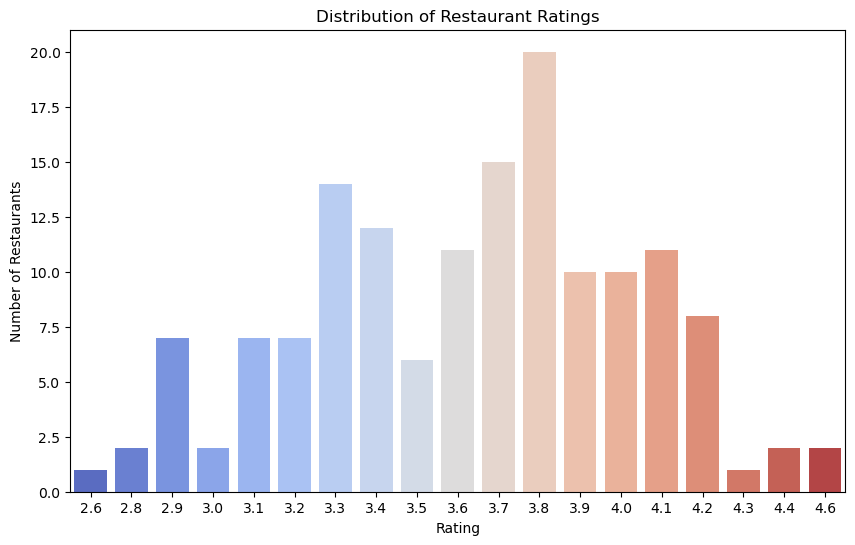

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(x=rate_counts.index, y=rate_counts.values, palette='coolwarm')
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Restaurants')
plt.show()

4)Zomato has observed that most couples order most of their food online. What is their average spending on each order?

Text(0.5, 1.0, 'Avg spending in each order')

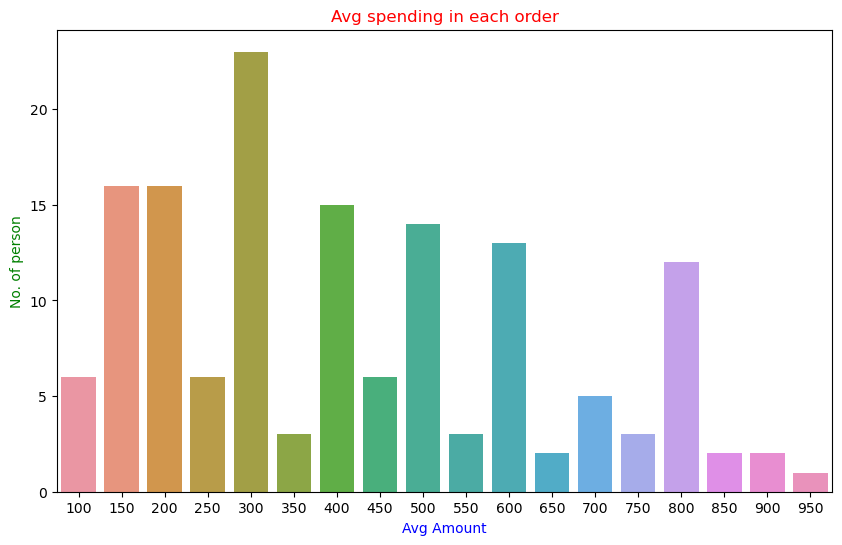

In [48]:
plt.figure(figsize=(10,6))
avg_spend= df['approx_cost(for two people)']
sns.countplot(x=avg_spend)
plt.xlabel("Avg Amount", c="blue")
plt.ylabel("No. of person", c="green")
plt.title("Avg spending in each order", c="red")

5.Which mode (online or offline) has received the maximum rating?

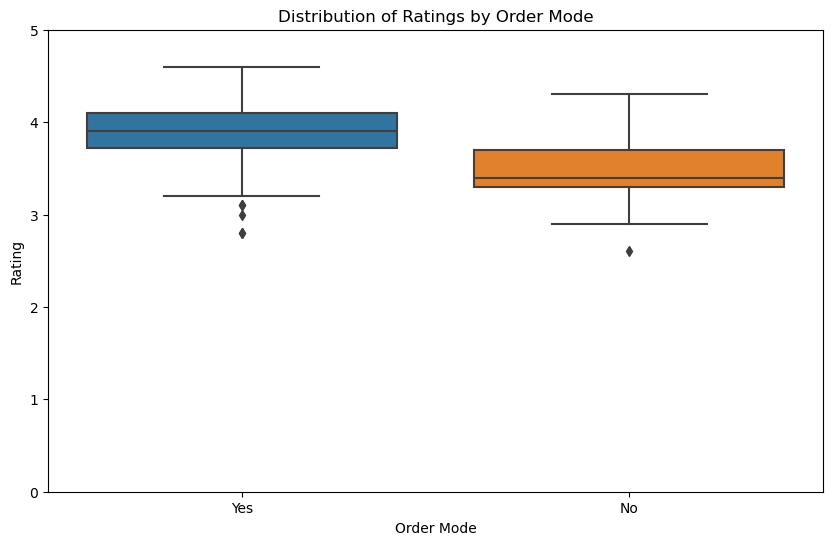

In [50]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='online_order', y='rate', data=df)
plt.xlabel('Order Mode')
plt.ylabel('Rating')
plt.title('Distribution of Ratings by Order Mode')
plt.ylim(0, 5)  
plt.show()

Which type of restaurant received more offline orders, so that Zomato can provide those customers with some good offers?

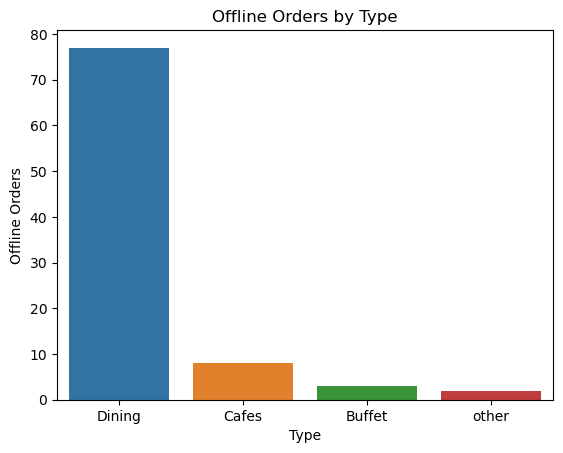

In [60]:
offline_order = df[df['online_order'] == 'No']['listed_in(type)'].value_counts()

sns.barplot(x=offline_order.index, y=offline_order.values)
plt.xlabel('Type')
plt.ylabel('Offline Orders')
plt.title('Offline Orders by Type')
plt.show()